<a href="https://colab.research.google.com/github/MigueLucena/Determinacion-Tipos-de-Estrellas/blob/main/Practica2NT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PABLO PÉREZ GARCÍA (100472243) MIGUEL LUCENA BELMONTE (100472277)**

**EJERCICIO 1: PROGRAMACIÓN DE K-MEANS Y COMPARACIÓN CON LA IMPLEMENTACIÓN DE SKLEARN**

*Usando el scaler StandardScaler:*

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def load_data(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Aplicar codificación one-hot a las columnas no numéricas
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

# Ejemplo de cómo utilizar la función
data = load_data("stars_data.csv")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

def kmeans_programada(data, n_clusters, max_iters=300):
  #Se inicializan los centroides aleatoriamente
  centroids = data[np.random.choice(data.shape[0], n_clusters, replace = False)]

  for _ in range(max_iters):
        # Asignamos cada punto al centroide más cercano
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

        # Actualizamos los centroides como la media de los puntos asignados a ellos
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Si los centroides no cambian, salimos del bucle
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

        return centroids, labels


#Especificamos el número de clusters con el que se va a trabajar
n_clusters = 3

# Medimos el tiempo de ejecución y comparar con la implementación de scikit-learn
start_time_custom = time.time()
centroids_custom, labels_custom = kmeans_programada(data, n_clusters)
end_time_custom = time.time()
custom_time = end_time_custom - start_time_custom

start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=n_clusters)
labels_sklearn = kmeans_sklearn.fit_predict(data)
end_time_sklearn = time.time()
sklearn_time = end_time_sklearn - start_time_sklearn

# Calculamos el coeficiente de silueta para ambas implementaciones
silhouette_custom = silhouette_score(data, labels_custom)
silhouette_sklearn = silhouette_score(data, labels_sklearn)

print("Resultados de K-Means personalizado:")
print("Centroides:", centroids_custom)
print("Etiquetas:", labels_custom)
print("Coeficiente de silueta:", silhouette_custom)
print("Tiempo de ejecución:", custom_time)

print("\nResultados de K-Means en scikit-learn:")
print("Centroides:", kmeans_sklearn.cluster_centers_)
print("Etiquetas:", labels_sklearn)
print("Coeficiente de silueta:", silhouette_sklearn)
print("Tiempo de ejecución:", sklearn_time)



Resultados de K-Means personalizado:
Centroides: [[-0.44852672 -0.59862334 -0.45913169  0.89095538  0.088       0.104
   0.          0.008       0.64        0.064       0.064       0.008
   0.008       0.016       0.056       0.168       0.104       0.
   0.032       0.64        0.        ]
 [-0.31423671  0.46305819  0.65975946 -1.00477267  0.17142857  0.22857143
   0.02857143  0.          0.45714286  0.05714286  0.05714286  0.
   0.          0.          0.17142857  0.11428571  0.05714286  0.01428571
   0.02857143  0.44285714  0.17142857]
 [ 1.73472022  0.94252988  0.24907333 -0.91189635  0.73333333  0.26666667
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.37777778  0.          0.
   0.          0.          0.62222222]]
Etiquetas: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


*Sin usar ningún scaler:*

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def load_data(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color


    # Detectar columnas no numéricas y aplicar codificación one-hot
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    if len(non_numeric_columns) > 0:
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])

        # Eliminar las columnas originales no numéricas
        data = data.drop(non_numeric_columns, axis=1)

        # Añadir los datos codificados al DataFrame original
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))
        data = pd.concat([data, encoded_columns], axis=1)

    return data.values

data = load_data("stars_data.csv")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:

# Medimos el tiempo de ejecución y comparar con la implementación de scikit-learn
start_time_custom = time.time()
centroids_custom, labels_custom = kmeans_programada(data, n_clusters)
end_time_custom = time.time()
custom_time = end_time_custom - start_time_custom

start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=n_clusters)
labels_sklearn = kmeans_sklearn.fit_predict(data)
end_time_sklearn = time.time()
sklearn_time = end_time_sklearn - start_time_sklearn

# Calculamos el coeficiente de silueta para ambas implementaciones
silhouette_custom = silhouette_score(data, labels_custom)
silhouette_sklearn = silhouette_score(data, labels_sklearn)

print("Resultados de K-Means personalizado:")
print("Centroides:", centroids_custom)
print("Etiquetas:", labels_custom)
print("Coeficiente de silueta:", silhouette_custom)
print("Tiempo de ejecución:", custom_time)

print("\nResultados de K-Means en scikit-learn:")
print("Centroides:", kmeans_sklearn.cluster_centers_)
print("Etiquetas:", labels_sklearn)
print("Coeficiente de silueta:", silhouette_sklearn)
print("Tiempo de ejecución:", sklearn_time)



Resultados de K-Means personalizado:
Centroides: [[ 1.57949438e+04  1.77284315e+05  4.93352723e+02 -5.13213483e+00
   4.83146067e-01  1.57303371e-01  0.00000000e+00  0.00000000e+00
   3.59550562e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.92134831e-01
   0.00000000e+00  1.12359551e-02  1.12359551e-02  3.37078652e-01
   3.48314607e-01]
 [ 6.09168148e+03  5.49979573e+01  6.96112667e-01  1.21330519e+01
   2.96296296e-02  1.77777778e-01  0.00000000e+00  7.40740741e-03
   5.92592593e-01  7.40740741e-02  8.88888889e-02  7.40740741e-03
   7.40740741e-03  1.48148148e-02  1.25925926e-01  1.25925926e-01
   1.25925926e-01  0.00000000e+00  2.96296296e-02  5.92592593e-01
   0.00000000e+00]
 [ 1.82040000e+04  6.21217375e+05  8.07218750e+02 -8.08918750e+00
   5.62500000e-01  1.87500000e-01  1.25000000e-01  0.00000000e+00
   0.00000000e+00  1.25000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.25000000e-01  1.87

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**EJERCICIO 2: CODIFICACIÓN DE ONE-HOT ENCODING Y CODIFICACIÓN COMO VARIABLE ORDINAL**

Resultados del k-means de sklearn con one-hot encoding:

In [23]:
start_time_onehot = time.time()
kmeans_onehot = KMeans(n_clusters=n_clusters)
labels_onehot = kmeans_onehot.fit_predict(data)
end_time_onehot = time.time()
onehot_time = end_time_onehot - start_time_onehot

silhouette_onehot = silhouette_score(data, labels_onehot)

print("\nResultados de K-Means usando One-Hot Encoding:")
print("Etiquetas:", labels_onehot)
print("Coeficiente de silueta:", silhouette_onehot)
print("Tiempo de ejecución:", onehot_time)


Resultados de K-Means usando One-Hot Encoding:
Etiquetas: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 0 2 2 2 2 2 0
 2 2 0 2 2 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 2
 2 1 2 2 1 1 2 1 2 2 1 1 1 2 1 1 2 2]
Coeficiente de silueta: 0.8102645811062422
Tiempo de ejecución: 0.02581501007080078


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resultados del k-means de sklearn codificando como variable ordinal:



In [24]:
from sklearn.preprocessing import OrdinalEncoder

def load_data(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Codificar las columnas no numéricas como variables ordinales
        encoder = OrdinalEncoder()
        ordinal_encoded_data = encoder.fit_transform(data[non_numeric_columns])
        ordinal_encoded_columns = pd.DataFrame(ordinal_encoded_data, columns=non_numeric_columns)

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, ordinal_encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = ordinal_encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

data = load_data("stars_data.csv")



start_time_ordinal = time.time()
kmeans_ordinal = KMeans(n_clusters=n_clusters)
labels_ordinal = kmeans_ordinal.fit_predict(data)
end_time_ordinal = time.time()
ordinal_time = end_time_ordinal - start_time_ordinal

silhouette_ordinal = silhouette_score(data, labels_ordinal)

print("\nResultados de K-Means usando One-Hot Encoding:")
print("Etiquetas:", labels_ordinal)
print("Coeficiente de silueta:", silhouette_ordinal)
print("Tiempo de ejecución:", ordinal_time)


Resultados de K-Means usando One-Hot Encoding:
Etiquetas: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 2 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 2 0 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 1 1 2 0 1 1 2 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 2 2
 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 0 0 2]
Coeficiente de silueta: 0.5580222683260437
Tiempo de ejecución: 0.01195216178894043


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Como se puede ver, el tiempo de ejecución usando el cifrado con OrdinalEncoder es menor que si usamos One-Hot Encoding, sin embargo, al realizar el cifrado de las variables categóricas con One-Hot Encoding se obtiene mayor coeficiente de silueta, lo que nos indica que es más preciso.

**EJERCICIO 3: APLICACIÓN DE ALGORITMOS DE CLUSTERING**

*Carga de datos aplicando One-Hot Encoding:*



In [25]:
from sklearn.decomposition import PCA

def load_data_onehot_pca(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color



    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Aplicar codificación one-hot a las columnas no numéricas
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)

    return data_pca

data_onehot_pca = load_data_onehot_pca("stars_data.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


*Carga de datos usando OrdinalEncoder:*

In [40]:
def load_data_ordinal_pca(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
    }

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color


    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Codificar las columnas no numéricas como variables ordinales
        encoder = OrdinalEncoder()
        ordinal_encoded_data = encoder.fit_transform(data[non_numeric_columns])
        ordinal_encoded_columns = pd.DataFrame(ordinal_encoded_data, columns=non_numeric_columns)

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, ordinal_encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = ordinal_encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)

    return data_pca

data_ordinal_pca = load_data_ordinal_pca("stars_data.csv")

*Aplicando Hierarchical Clustering:*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


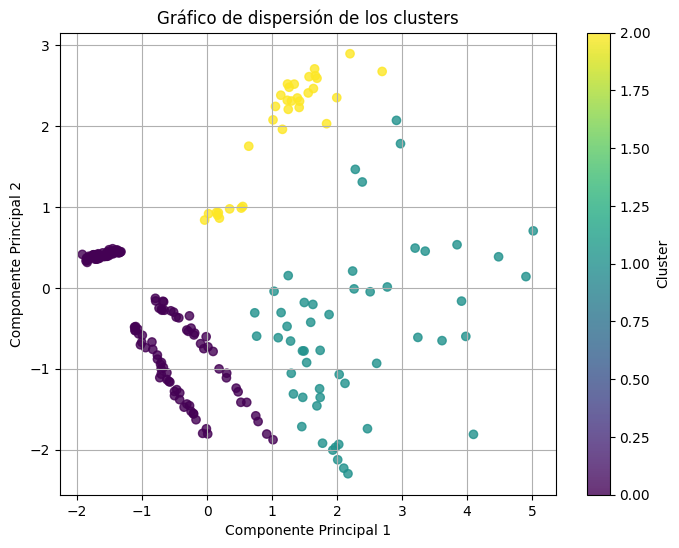

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Ejemplo de datos
# Supongamos que 'data_onehot_pca' son tus datos, y 'labels_onehot_pca' son las etiquetas de clustering

# PCA para reducción de dimensionalidad (asumiendo que data_onehot_pca ya está en un formato apto)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_onehot_pca)

# Clustering jerárquico
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = clustering.fit_predict(data_onehot_pca)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Como se puede observar, hay una clara diferenciación entre clusters, ya que hay una correcta separación ellos. Este hecho nos lleva a pensar que se han identificado correctamente unos patrones distintos entre los datos y que estos (los datos) han sido separados de forma coherente, lo que facilita también mucho el estudio de los resultados. Cabe destacar que una buena diferenciación entre clusters, como es en este caso, podría indicar una buena selección de algoritmo de clustering.

Sin embargo, con respecto a la dispersión dentro del mismo cluster, es cierto que podemos encontrar una alta separación entre los datos del mismo cluster, lo que indica una alta variabilidad. Podría significar que existen ciertos subgrupos o subpoblaciones dentro del cluster, o incluso que el cluster contenga ciertos puntos de ruido, que nos lleva a pensar que no hay una estructura concreta dentro de él. Una alta dispersión dentro del mismo cluster podría estar señalando que no estamos eligiendo un buen método de clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


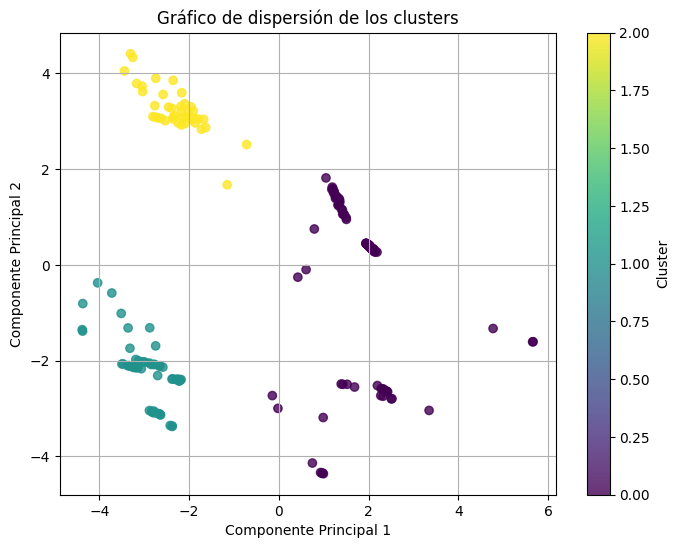

Resultados del clustering jerárquico:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 2 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 2 1 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 0 2 1 0 0 2 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 0 2 2
 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 0 0 2]


In [42]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_ordinal_pca)

# Clustering jerárquico
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = clustering.fit_predict(data_ordinal_pca)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Imprimir los resultados del clustering
print("Resultados del clustering jerárquico:")
print(labels)

Lo cierto es que la separación entre clusters es bastante grande, que como decíamos anteriormente, significa que se han identificado satisfactoriamente los diferencias entre patrones y datos distintos, facilitando así el estudio. Esto indica un buen proceso de clustering con los datos tratados.

En cuanto a la separación de los puntos dentro del mismo cluster, sigue existiendo cierta dispersión en algún cluster. En concreto, en uno de ellos se pueden observar claramente la existencia de 2 subpoblaciones, lo que señala la presencia de dos patrones de datos totalmente distintos. Sin embargo, con respecto a los otros clusters representados, se observa una baja dispersión, lo que nos hace reflexionar que podría ser un buen algoritmo de clustering para trabajar con estos datos.

*Aplicando DBSCAN:*

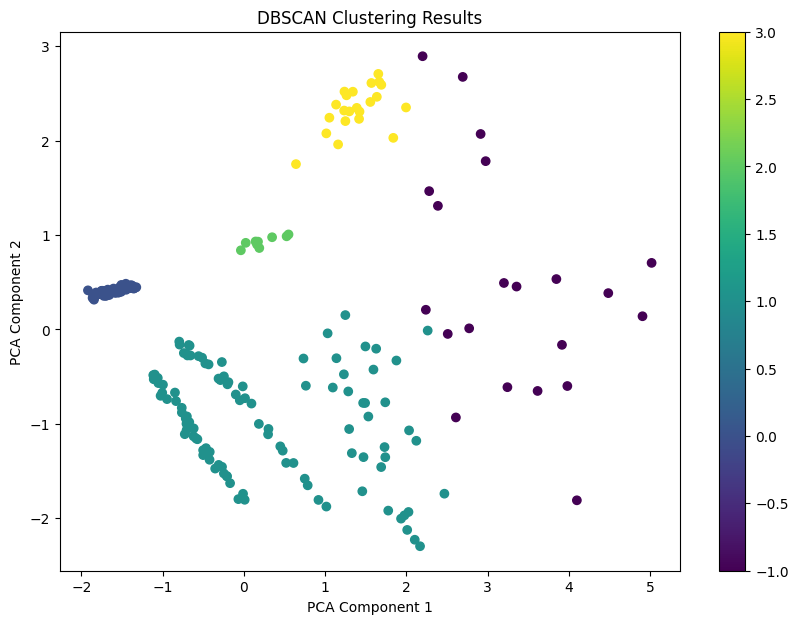

Resultados del clustering DBSCAN:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  1  3  3  3 -1  3  3 -1  3  3  3  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  3  3  3  3  3  3  3  3  3  3
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  3  3 -1 -1  3  3 -1 -1  1 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Coeficiente de Silueta: 0.5007113361471031


In [29]:
from sklearn.cluster import DBSCAN


# Aplicar el algoritmo DBSCAN
eps = 0.5  # Radio de vecindad
min_samples = 5  # Número mínimo de puntos en una vecindad para ser considerado core point
clustering = DBSCAN(eps=eps, min_samples=min_samples)
labels_onehot_pca = clustering.fit_predict(data_onehot_pca)

# Calcular el coeficiente de silueta (opcional)
silhouette_avg = silhouette_score(data_onehot_pca, labels_onehot_pca)

# Graficar los resultados del clustering
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_onehot_pca[:, 0], data_onehot_pca[:, 1], c=labels_onehot_pca, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter)
plt.show()

# Imprimir los resultados del clustering
print("Resultados del clustering DBSCAN:")
print(labels_onehot_pca)

# Si deseas imprimir el coeficiente de silueta
print("Coeficiente de Silueta:", silhouette_avg)


Después de llevar a cabo la representación de los datos, nos damos cuenta que entre ciertos clusters no existe una gran dispersión, lo que nos indica que quizás no se han sabido diferenciar de la mejor manera los distintos datos y patrones.

Además, dentro de los propios clusters se encuentra una gran dispersión, lo que, además de dificultar el estudio de los datos, señala que existe una alta diferenciación en los valores dentro del mismo grupo. Esto y lo mencionado anteriormente, nos lleva a la teoría de que este método de clustering no sea el más indicado.

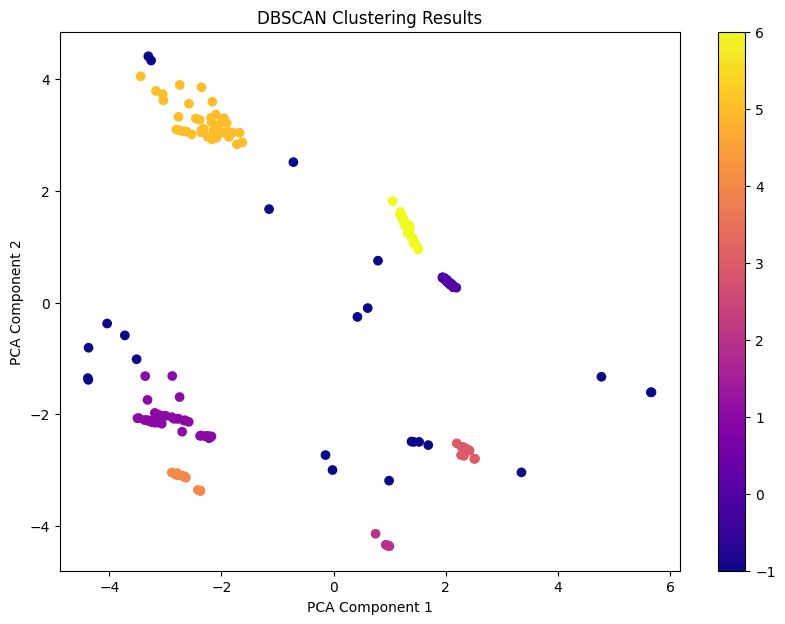

Resultados del clustering DBSCAN:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2 -1  2
  1  3  4  3  3 -1  5  1  1 -1  3  2  3  3  3  3  6  6  6  6  6  6  6  6
  6 -1  6  6  6 -1  6  6  6  6  6  6  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  3 -1  2  1  1  4  1  1 -1  1  3 -1 -1 -1  4  4
 -1  3  4  5 -1  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6 -1  6 -1  6
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  4  1 -1  2  1  1  4  4  1  1  1  1  1  4  5  5  5  5  5  5  5  5  5
  5  5  6  6 -1 -1  6  6  5  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  4  4  1  5  5
  4  1  1  3  5  5  5  5  5  5  5  5  5  5 -1  5 -1 -1 -1  5 -1 -1 -1  5]
Coeficiente de Silueta: 0.6519124562984733


In [44]:
# Aplicar el algoritmo DBSCAN
eps = 0.5  # Radio de vecindad
min_samples = 5  # Número mínimo de puntos en una vecindad para ser considerado core point
clustering = DBSCAN(eps=eps, min_samples=min_samples)
labels_ordinal_pca = clustering.fit_predict(data_ordinal_pca)

# Calcular el coeficiente de silueta (opcional)
silhouette_avg = silhouette_score(data_ordinal_pca, labels_ordinal_pca)

# Graficar los resultados del clustering
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_ordinal_pca[:, 0], data_ordinal_pca[:, 1], c=labels_ordinal_pca, cmap='plasma', marker='o')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter)
plt.show()

# Imprimir los resultados del clustering
print("Resultados del clustering DBSCAN:")
print(labels_ordinal_pca)

# Si deseas imprimir el coeficiente de silueta
print("Coeficiente de Silueta:", silhouette_avg)

Como se puede observar en la gráfica, la elección de esta forma de tratar los datos resulta ser bastante decepcionante, ya que no existe una gran separación entre clusters (no se han conseguido diferenciar bien los patrones entre sí) y además dentro de los propios clusters, existe una gran dispersión lo que dificulta muchísimo el estudio de los datos. LLegamos a la conclusión de que este método de clustering tratado con estos datos no es el más correcto.